<a href="https://colab.research.google.com/github/raunak0008/Motion-Detection/blob/main/MotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>IMPORT MODULES</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import time

In [2]:
#load and preprocess the image
def load_and_preprocess(image_path):
  image=cv2.imread(image_path)
  image=cv2.resize(image,(1200,720))
  gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  return image,gray_image


#substract images

def substract_images(image1,image2):
  diff=cv2.absdiff(image1,image2)
  _, thresh=cv2.threshold(diff,85,255,cv2.THRESH_BINARY)
  return diff, thresh

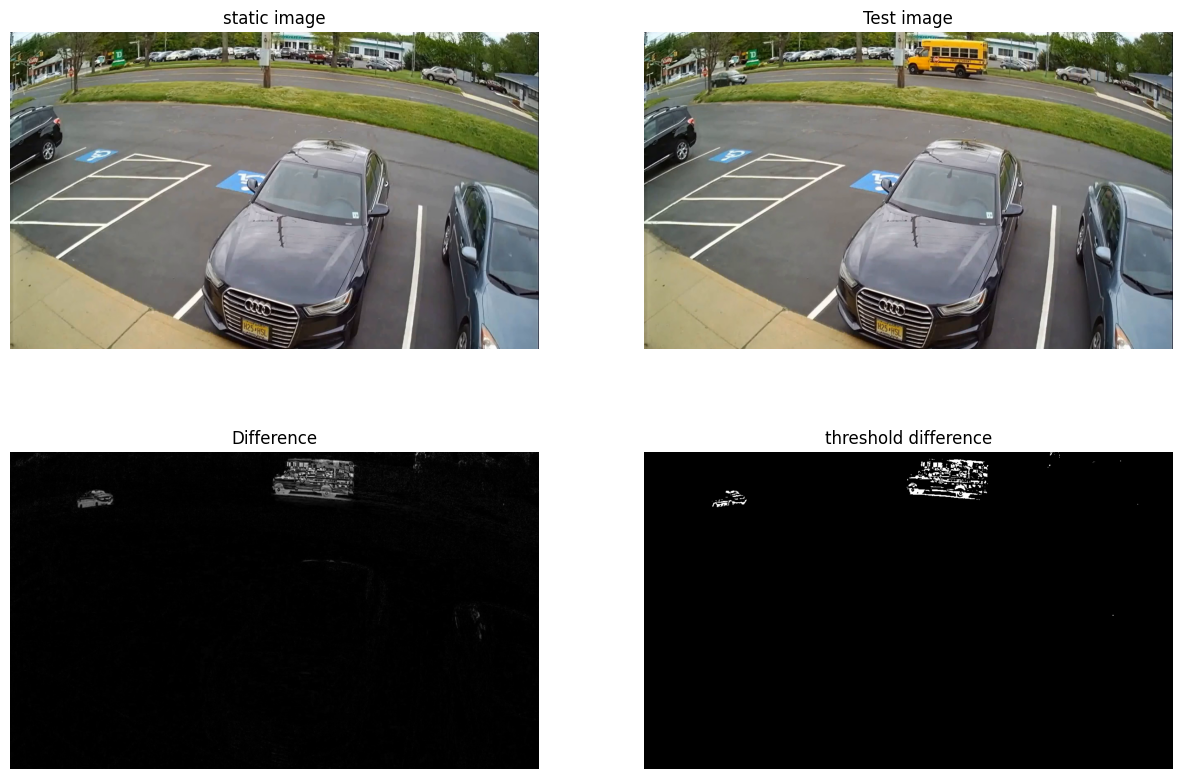

In [8]:
image_path1='/content/drive/MyDrive/static.png'
image_path2='/content/drive/MyDrive/test.png'
image1,gray_image1=load_and_preprocess(image_path1)
image2,gray_image2=load_and_preprocess(image_path2)
#substract the image

diff,thresh=substract_images(gray_image1,gray_image2)
#plot te image

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)

plt.title('static image')
plt.imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB))
plt.axis('off')


plt.subplot(2,2,2)

plt.title('Test image')
plt.imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
plt.axis('off')




plt.subplot(2,2,3)

plt.title('Difference')
plt.imshow(diff,cmap='gray')
plt.axis('off')


plt.subplot(2,2,4)
plt.title('threshold difference')
plt.imshow(thresh,cmap='gray')
plt.axis('off')

plt.show()

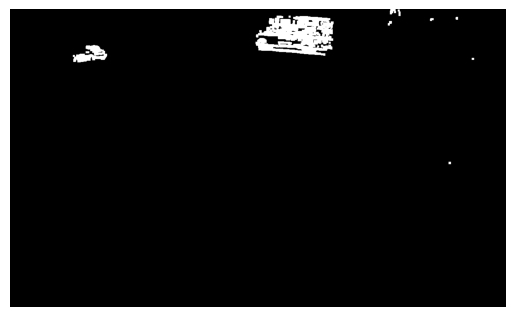

In [12]:
dilated_image=cv2.dilate(thresh,None,iterations=2)
plt.imshow(dilated_image,cmap='gray')
plt.axis('off')
plt.show()


In [15]:
cnts=cv2.findContours(dilated_image.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)
cnts

(array([[[1061,  369]],
 
        [[1061,  374]],
 
        [[1066,  374]],
 
        [[1066,  369]]], dtype=int32),
 array([[[1117,  118]],
 
        [[1117,  122]],
 
        [[1122,  122]],
 
        [[1122,  118]]], dtype=int32),
 array([[[183, 102]],
 
        [[183, 106]],
 
        [[191, 106]],
 
        [[191, 102]]], dtype=int32),
 array([[[201,  87]],
 
        [[200,  88]],
 
        [[197,  88]],
 
        [[196,  89]],
 
        [[194,  89]],
 
        [[193,  88]],
 
        [[184,  88]],
 
        [[184,  89]],
 
        [[183,  90]],
 
        [[183,  95]],
 
        [[184,  95]],
 
        [[185,  96]],
 
        [[187,  96]],
 
        [[188,  97]],
 
        [[193,  97]],
 
        [[194,  98]],
 
        [[194, 101]],
 
        [[198, 101]],
 
        [[199, 102]],
 
        [[199, 105]],
 
        [[202, 105]],
 
        [[203, 106]],
 
        [[203, 110]],
 
        [[204, 110]],
 
        [[205, 111]],
 
        [[204, 112]],
 
        [[202, 112]],
 
        [

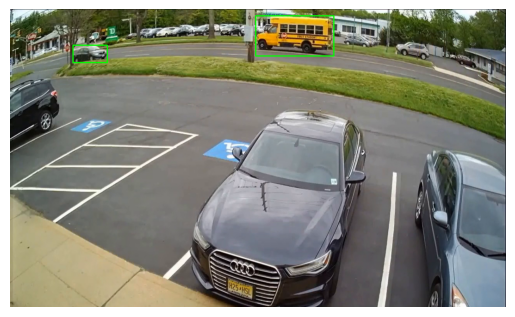

In [27]:
#iterate the contours
for c in cnts:
  if cv2.contourArea(c)<700:
    continue

    #get bounding coordinates

  (x,y,w,h)=cv2.boundingRect(c)
  cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)


plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


<h1>#Test in real time or video

In [37]:
import cv2
import imutils
from IPython.display import HTML
from base64 import b64encode

# --- Input and Output paths ---
video_path = '/content/drive/MyDrive/test.mp4'
output_path = '/content/drive/MyDrive/output.mp4'

# --- Open the video ---
video_cap = cv2.VideoCapture(video_path)
if not video_cap.isOpened():
    print("Error: Could not open video.")

# --- Get video properties ---
width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_cap.get(cv2.CAP_PROP_FPS))

# --- Create VideoWriter to save output ---
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # for mp4 format
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# --- Initialize background frame ---
static_frame = None

# --- Motion detection loop ---
while True:
    success, frame = video_cap.read()
    if not success:
        break

    # Resize for faster processing if needed
    # frame = cv2.resize(frame, (640, 360))  # optional

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if static_frame is None:
        static_frame = gray
        continue

    # Background subtraction
    diff = cv2.absdiff(static_frame, gray)
    _, thresh = cv2.threshold(diff, 85, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=2)

    # Find contours
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # Draw bounding boxes
    for c in cnts:
        if cv2.contourArea(c) < 700:
            continue
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Write processed frame to output video
    out.write(frame)

# --- Release resources ---
video_cap.release()
out.release()
cv2.destroyAllWindows()

# --- Display saved video in Colab ---
mp4 = output_path
mp4_bytes = open(mp4,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4_bytes).decode()
HTML(f"""<video width=640 controls><source src="{data_url}" type="video/mp4"></video>""")
